In [1]:
import tensorflow as tf

In [2]:
# More imports
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, \
  Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.utils import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./ratings.csv')
movies_df = pd.read_csv('./movies.csv')

In [4]:
df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [7]:
df['userId'].values

array([     1,      1,      1, ..., 162541, 162541, 162541], dtype=int64)

In [8]:
df['movieId'].values

array([  296,   306,   307, ..., 56176, 58559, 63876], dtype=int64)

In [9]:
df.userId = pd.Categorical(df.userId)
df['new_user_id'] = df.userId.cat.codes

In [10]:
df.movieId = pd.Categorical(df.movieId)
df['new_movie_id'] = df.movieId.cat.codes

In [11]:
user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values

In [12]:
# Get number of users and number of movies
N = len(set(user_ids))
M = len(set(movie_ids))

# Set embedding dimension
K = 10

In [13]:
N

162541

In [14]:
M

59047

In [15]:
K

10

In [16]:
# Make a neural network

# User input
u = Input(shape=(1,))

# Movie input
m = Input(shape=(1,))

# User embedding
u_emb = Embedding(N, K)(u) # output is (num_samples, 1, K)

# Movie embedding
m_emb = Embedding(M, K)(m) # output is (num_samples, 1, K)

# Flatten both embeddings
u_emb = Flatten()(u_emb) # now it's (num_samples, K)
m_emb = Flatten()(m_emb) # now it's (num_samples, K)

# Concatenate user-movie embeddings into a feature vector
x = Concatenate()([u_emb, m_emb]) # now it's (num_samples, 2K)

# Now that we have a feature vector, it's just a regular ANN
x = Dense(1024, activation='relu')(x)
# x = Dense(400, activation='relu')(x)
# x = Dense(400, activation='relu')(x)
x = Dense(1)(x)

In [17]:
# Build the model and compile
model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
  optimizer=SGD(learning_rate=0.08, momentum=0.9),
)

In [18]:
# split the data
user_ids, movie_ids, ratings = shuffle(user_ids, movie_ids, ratings)
Ntrain = int(0.8 * len(ratings))
train_user = user_ids[:Ntrain]
train_movie = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]

test_user = user_ids[Ntrain:]
test_movie = movie_ids[Ntrain:]
test_ratings = ratings[Ntrain:]

# center the ratings
avg_rating = train_ratings.mean()
train_ratings = train_ratings - avg_rating
test_ratings = test_ratings - avg_rating

In [20]:
r = model.fit(
  x=[train_user, train_movie],
  y=train_ratings,
  epochs=25,
  batch_size=1024,
  validation_data=([test_user, test_movie], test_ratings),
)

Epoch 1/25
19532/19532 [==============================] - 85s 4ms/step - loss: 0.7014 - val_loss: 0.6987
Epoch 2/25
19532/19532 [==============================] - 81s 4ms/step - loss: 0.6781 - val_loss: 0.6815
Epoch 3/25
19532/19532 [==============================] - 81s 4ms/step - loss: 0.6613 - val_loss: 0.6719
Epoch 4/25
19532/19532 [==============================] - 81s 4ms/step - loss: 0.6478 - val_loss: 0.6657
Epoch 5/25
19532/19532 [==============================] - 80s 4ms/step - loss: 0.6333 - val_loss: 0.6511
Epoch 6/25
19532/19532 [==============================] - 79s 4ms/step - loss: 0.6160 - val_loss: 0.6415
Epoch 7/25
19532/19532 [==============================] - 79s 4ms/step - loss: 0.6022 - val_loss: 0.6357
Epoch 8/25
19532/19532 [==============================] - 79s 4ms/step - loss: 0.5914 - val_loss: 0.6319
Epoch 9/25
19532/19532 [==============================] - 79s 4ms/step - loss: 0.5809 - val_loss: 0.6274
Epoch 10/25
19532/19532 [==============================

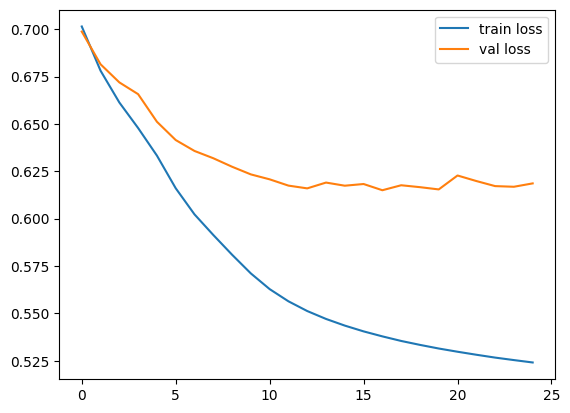

In [21]:
# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="val loss")
plt.legend()
plt.show()

In [67]:
user_id = np.random.randint(0, len(set(user_ids)))
user_id

139705

In [68]:
watched_movie_ids = df[df.new_user_id == user_id].new_movie_id.values

In [69]:
watched_movie_ids

array([    0,     5,    31,    43,    46,    49,    61,   143,   148,
         158,   163,   166,   183,   249,   257,   288,   292,   312,
         313,   314,   334,   348,   351,   359,   372,   375,   435,
         449,   452,   469,   480,   489,   495,   534,   579,   580,
         581,   584,   589,   600,   637,   718,   721,   764,   769,
         770,   786,   814,   840,  1005,  1013,  1024,  1061,  1063,
        1070,  1073,  1074,  1166,  1167,  1168,  1179,  1182,  1207,
        1226,  1232,  1258,  1268,  1273,  1338,  1341,  1357,  1358,
        1383,  1464,  1475,  1517,  1540,  1550,  1561,  1566,  1591,
        1620,  1640,  1655,  1666,  1683,  1701,  1707,  1787,  1829,
        1865,  1872,  1873,  1878,  1879,  1911,  1914,  1915,  1916,
        1922,  1939,  1969,  2054,  2055,  2084,  2200,  2262,  2311,
        2312,  2316,  2318,  2319,  2320,  2329,  2340,  2399,  2411,
        2448,  2480,  2481,  2526,  2579,  2602,  2625,  2632,  2671,
        2705,  2789,

In [70]:
potential_movie_ids = df[~df.new_movie_id.isin(watched_movie_ids)].new_movie_id.unique()

In [71]:
# How many?
potential_movie_ids.shape

(58617,)

In [72]:
# Repeat the user id this many times
user_id_to_recommend = np.full_like(potential_movie_ids, user_id)

In [73]:
predictions = model.predict([user_id_to_recommend, potential_movie_ids])

1832/1832 [==============================] - 3s 1ms/step


In [74]:
predictions.shape

(58617, 1)

In [75]:
sort_idx = np.argsort(-predictions.flatten())

In [76]:
top_10_movie_ids = potential_movie_ids[sort_idx[:10]]
top_10_scores = predictions[sort_idx[:10]]

for movie, score in zip(top_10_movie_ids, top_10_scores):
  movieId = df.loc[df['new_movie_id'] == movie, 'movieId'].values[0]
  movie_string = movies_df.loc[movies_df['movieId'] == movieId, 'title'].values[0]
  print("movie:", movie_string, "score:", score)

movie: The Red Pill (2016) score: [1.5875003]
movie: Five Fingers (2006) score: [1.5863907]
movie: Jimmy Carr: Funny Business (2016) score: [1.39489]
movie: Kept Woman (2015) score: [1.387048]
movie: Stranger in the House (1997) score: [1.354883]
movie: Wolf Creek 2 (2013) score: [1.3481566]
movie: Kid Cannabis (2014) score: [1.3470193]
movie: Tomorrow (2015) score: [1.3307288]
movie: Daniel Tosh: Happy Thoughts (2011) score: [1.294832]
movie: Requisitos para ser una persona normal (2015) score: [1.2847512]
